In [1]:
import ipykernel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import datetime

In [2]:
misV=[' ',0.00,'N/A',np.nan]


In [3]:
df_2 = pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Federal\Pre.csv')
df_2.tail()


,system:time_start,precipitation
4013,"Dec 27, 2021",0.000
4014,"Dec 28, 2021",0.000
4015,"Dec 29, 2021",0.000
4016,"Dec 30, 2021",30.744
4017,"Dec 31, 2021",0.000


In [4]:
df_1 = pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Federal\pre1.csv')
df_1.tail()

,system:time_start,precipitation
4013,"Dec 27, 2010",0.000
4014,"Dec 28, 2010",0.200
4015,"Dec 29, 2010",8.076
4016,"Dec 30, 2010",7.489
4017,"Dec 31, 2010",1.017


In [5]:
df=df_1.append(df_2)

C:\Users\wwwkh\AppData\Local\Temp\ipykernel_9168\658501775.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_1.append(df_2)


In [6]:
df['system:time_start']=df['system:time_start'].apply(lambda x: x.replace(',',''))
df

,system:time_start,precipitation
0,Jan 1 2000,0.000
1,Jan 2 2000,0.000
2,Jan 3 2000,0.000
3,Jan 4 2000,0.000
4,Jan 5 2000,0.000
...,...,...
4013,Dec 27 2021,0.000
4014,Dec 28 2021,0.000
4015,Dec 29 2021,0.000
4016,Dec 30 2021,30.744


In [7]:
df[["month","day", "year"]] = df["system:time_start"].str.split(" ", expand = True)
df['date']=df["month"]+ ' ' +df["year"]
df

,system:time_start,precipitation,month,day,year,date
0,Jan 1 2000,0.000,Jan,1,2000,Jan 2000
1,Jan 2 2000,0.000,Jan,2,2000,Jan 2000
2,Jan 3 2000,0.000,Jan,3,2000,Jan 2000
3,Jan 4 2000,0.000,Jan,4,2000,Jan 2000
4,Jan 5 2000,0.000,Jan,5,2000,Jan 2000
...,...,...,...,...,...,...
4013,Dec 27 2021,0.000,Dec,27,2021,Dec 2021
4014,Dec 28 2021,0.000,Dec,28,2021,Dec 2021
4015,Dec 29 2021,0.000,Dec,29,2021,Dec 2021
4016,Dec 30 2021,30.744,Dec,30,2021,Dec 2021


In [8]:
l1=[]
month=1
year=0
days=0
data=0
for i in df['precipitation']:
    days+=1
    data+=i
    if month in [1,3,5,7,8,10,12] and days==31:
        l1.append(data)
        days=data=0
        if month==12:
            month=1
            year+=1
        else:
            month+=1
    elif month in [4,6,9,11] and days==30:
        l1.append(data)
        days=data=0
        month+=1
    elif month==2 and days==29 and year in [0,4,8,16,20]: 
        l1.append(data)
        days=data=0
        month+=1
    elif month==2 and days==28 and year in [1,2,3,5,6,7,9,10,11,12,13,14,15,17,18,19,21]: 
        l1.append(data)
        days=data=0
        month+=1
Prep_monthly=l1

In [9]:
len(Prep_monthly)

264

In [10]:
Prep_monthly.pop(0)
len(Prep_monthly)

263

In [11]:
df_t1 = pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Federal\temp1.csv',na_values=misV)
df_t1


,system:time_start,LST_Day_1km
0,"Feb 24, 2000",NaN
1,"Feb 25, 2000",NaN
2,"Feb 26, 2000",22.126
3,"Feb 27, 2000",20.891
4,"Feb 28, 2000",17.897
...,...,...
3910,"Dec 27, 2010",15.274
3911,"Dec 28, 2010",NaN
3912,"Dec 29, 2010",NaN
3913,"Dec 30, 2010",NaN


In [12]:
df_t2 = pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Federal\Temp.csv',na_values=misV)
df_t2

,system:time_start,LST_Day_1km
0,"Jan 1, 2011",13.318
1,"Jan 2, 2011",13.776
2,"Jan 3, 2011",9.630
3,"Jan 4, 2011",10.412
4,"Jan 5, 2011",10.431
...,...,...
4004,"Dec 27, 2021",NaN
4005,"Dec 28, 2021",12.611
4006,"Dec 29, 2021",14.796
4007,"Dec 30, 2021",10.989


In [13]:
df1=df_t1.append(df_t2)
df1.isnull()

C:\Users\wwwkh\AppData\Local\Temp\ipykernel_9168\3478089583.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df_t1.append(df_t2)


,system:time_start,LST_Day_1km
0,False,True
1,False,True
2,False,False
3,False,False
4,False,False
...,...,...
4004,False,True
4005,False,False
4006,False,False
4007,False,False


In [14]:
df1=df1.fillna(method='bfill')
df1.count().isnull()

system:time_start    False
LST_Day_1km          False
dtype: bool

In [15]:
df1['system:time_start']=df1['system:time_start'].apply(lambda x: x.replace(',',''))
df1

,system:time_start,LST_Day_1km
0,Feb 24 2000,22.126
1,Feb 25 2000,22.126
2,Feb 26 2000,22.126
3,Feb 27 2000,20.891
4,Feb 28 2000,17.897
...,...,...
4004,Dec 27 2021,12.611
4005,Dec 28 2021,12.611
4006,Dec 29 2021,14.796
4007,Dec 30 2021,10.989


In [16]:
df1[["month","day", "year"]] = df1["system:time_start"].str.split(" ", expand = True)
df1['date']=df1["month"]+ ' ' +df1["year"]
df1

,system:time_start,LST_Day_1km,month,day,year,date
0,Feb 24 2000,22.126,Feb,24,2000,Feb 2000
1,Feb 25 2000,22.126,Feb,25,2000,Feb 2000
2,Feb 26 2000,22.126,Feb,26,2000,Feb 2000
3,Feb 27 2000,20.891,Feb,27,2000,Feb 2000
4,Feb 28 2000,17.897,Feb,28,2000,Feb 2000
...,...,...,...,...,...,...
4004,Dec 27 2021,12.611,Dec,27,2021,Dec 2021
4005,Dec 28 2021,12.611,Dec,28,2021,Dec 2021
4006,Dec 29 2021,14.796,Dec,29,2021,Dec 2021
4007,Dec 30 2021,10.989,Dec,30,2021,Dec 2021


In [17]:
Temp_monthly =  df1.groupby('date',as_index=False)['LST_Day_1km'].mean()
Temp_monthly

,date,LST_Day_1km
0,Apr 2000,36.019214
1,Apr 2001,34.358333
2,Apr 2002,32.810517
3,Apr 2003,30.650567
4,Apr 2004,30.076800
...,...,...
258,Sep 2017,30.176567
259,Sep 2018,29.031900
260,Sep 2019,29.235333
261,Sep 2020,31.459200


In [18]:
df_s1 = pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Federal\ndsi1.csv',na_values=misV)
df_s1=df_s1.fillna(method='ffill')
df_s1.tail(10)

,system:time_start,NDSI
3907,"Dec 22, 2010",-0.318
3908,"Dec 23, 2010",-0.342
3909,"Dec 24, 2010",-0.366
3910,"Dec 25, 2010",-0.375
3911,"Dec 26, 2010",-0.405
3912,"Dec 27, 2010",-0.334
3913,"Dec 28, 2010",0.363
3914,"Dec 29, 2010",0.422
3915,"Dec 30, 2010",0.547
3916,"Dec 31, 2010",-0.243


In [19]:
df_s2 = pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Federal\Ndsi.csv',na_values=misV)
df_s2=df_s2.fillna(method='ffill')
df_s2.tail(10)

,system:time_start,NDSI
3998,"Dec 22, 2021",-0.424
3999,"Dec 23, 2021",-0.249
4000,"Dec 24, 2021",-0.412
4001,"Dec 25, 2021",-0.286
4002,"Dec 26, 2021",0.151
4003,"Dec 27, 2021",0.218
4004,"Dec 28, 2021",-0.400
4005,"Dec 29, 2021",-0.477
4006,"Dec 30, 2021",-0.290
4007,"Dec 31, 2021",-0.443


In [20]:
df2=df_s1.append(df_s2)
df2.head(145)

C:\Users\wwwkh\AppData\Local\Temp\ipykernel_9168\218998936.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df_s1.append(df_s2)


,system:time_start,NDSI
0,"Feb 24, 2000",NaN
1,"Feb 25, 2000",NaN
2,"Feb 26, 2000",-0.420
3,"Feb 27, 2000",-0.210
4,"Feb 28, 2000",-0.091
...,...,...
140,"Jul 13, 2000",-0.330
141,"Jul 14, 2000",-0.239
142,"Jul 15, 2000",-0.266
143,"Jul 16, 2000",0.291


In [21]:

df2['system:time_start']=df2['system:time_start'].apply(lambda x: x.replace(',',''))
df2

,system:time_start,NDSI
0,Feb 24 2000,NaN
1,Feb 25 2000,NaN
2,Feb 26 2000,-0.420
3,Feb 27 2000,-0.210
4,Feb 28 2000,-0.091
...,...,...
4003,Dec 27 2021,0.218
4004,Dec 28 2021,-0.400
4005,Dec 29 2021,-0.477
4006,Dec 30 2021,-0.290


In [22]:
df2[["month","day", "year"]] = df2["system:time_start"].str.split(" ", expand = True)
df2['date']=df2["month"]+ ' ' +df2["year"]
df2

,system:time_start,NDSI,month,day,year,date
0,Feb 24 2000,NaN,Feb,24,2000,Feb 2000
1,Feb 25 2000,NaN,Feb,25,2000,Feb 2000
2,Feb 26 2000,-0.420,Feb,26,2000,Feb 2000
3,Feb 27 2000,-0.210,Feb,27,2000,Feb 2000
4,Feb 28 2000,-0.091,Feb,28,2000,Feb 2000
...,...,...,...,...,...,...
4003,Dec 27 2021,0.218,Dec,27,2021,Dec 2021
4004,Dec 28 2021,-0.400,Dec,28,2021,Dec 2021
4005,Dec 29 2021,-0.477,Dec,29,2021,Dec 2021
4006,Dec 30 2021,-0.290,Dec,30,2021,Dec 2021


In [23]:
Ndsi_monthly =  df2.groupby('date',as_index=False)['NDSI'].mean()
Ndsi_monthly 

,date,NDSI
0,Apr 2000,-0.217567
1,Apr 2001,-0.150733
2,Apr 2002,-0.169897
3,Apr 2003,-0.224033
4,Apr 2004,-0.089633
...,...,...
258,Sep 2017,-0.360600
259,Sep 2018,-0.277133
260,Sep 2019,-0.198833
261,Sep 2020,-0.301933


In [24]:
df_v1 = pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Federal\veg1.csv',na_values=misV)
df_v1.tail(10)

,system:time_start,NDVI
240,"Jul 28, 2010","4,731.628"
241,"Aug 13, 2010","5,557.338"
242,"Aug 29, 2010","5,609.839"
243,"Sep 14, 2010","5,274.886"
244,"Sep 30, 2010","4,502.56"
245,"Oct 16, 2010","4,008.802"
246,"Nov 1, 2010","3,774.47"
247,"Nov 17, 2010","3,780.573"
248,"Dec 3, 2010","3,551.792"
249,"Dec 19, 2010","3,414.937"


In [25]:
df_v1.dtypes

system:time_start    object
NDVI                 object
dtype: object

In [26]:
df_v1['NDVI']=df_v1['NDVI'].str.replace(',','')
df_v1['NDVI'] = df_v1['NDVI'].astype(float)
df_v1.dtypes


system:time_start     object
NDVI                 float64
dtype: object

In [27]:
df_v2 = pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Federal\Veg.csv',na_values=misV)
df_v2.tail(10)

,system:time_start,NDVI
243,"Jul 28, 2021","5,697.975"
244,"Aug 13, 2021","5,417.487"
245,"Aug 29, 2021","5,214.788"
246,"Sep 14, 2021","5,183.178"
247,"Sep 30, 2021","4,698.109"
248,"Oct 16, 2021","4,414.546"
249,"Nov 1, 2021","4,109.448"
250,"Nov 17, 2021","3,882.179"
251,"Dec 3, 2021","3,918.833"
252,"Dec 19, 2021","3,733.376"


In [28]:
df_v2.dtypes

system:time_start    object
NDVI                 object
dtype: object

In [29]:
df_v2['NDVI']=df_v2['NDVI'].str.replace(',','')
df_v2['NDVI'] = df_v2['NDVI'].astype(float)
df_v2.dtypes


system:time_start     object
NDVI                 float64
dtype: object

In [30]:
df3=df_v1.append(df_v2)


C:\Users\wwwkh\AppData\Local\Temp\ipykernel_9168\1710664389.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3=df_v1.append(df_v2)


In [31]:
df3=df3.fillna(method='ffill')
df3.count().isnull()

system:time_start    False
NDVI                 False
dtype: bool

In [32]:
df3['system:time_start']=df3['system:time_start'].apply(lambda x: x.replace(',',''))
df3

,system:time_start,NDVI
0,Feb 18 2000,3974.750
1,Mar 5 2000,3921.206
2,Mar 21 2000,4089.473
3,Apr 6 2000,3760.469
4,Apr 22 2000,3016.761
...,...,...
248,Oct 16 2021,4414.546
249,Nov 1 2021,4109.448
250,Nov 17 2021,3882.179
251,Dec 3 2021,3918.833


In [33]:
df3[["month","day", "year"]] = df3["system:time_start"].str.split(" ", expand = True)
df3['date']=df3["month"]+' '+df3["year"]
df3

,system:time_start,NDVI,month,day,year,date
0,Feb 18 2000,3974.750,Feb,18,2000,Feb 2000
1,Mar 5 2000,3921.206,Mar,5,2000,Mar 2000
2,Mar 21 2000,4089.473,Mar,21,2000,Mar 2000
3,Apr 6 2000,3760.469,Apr,6,2000,Apr 2000
4,Apr 22 2000,3016.761,Apr,22,2000,Apr 2000
...,...,...,...,...,...,...
248,Oct 16 2021,4414.546,Oct,16,2021,Oct 2021
249,Nov 1 2021,4109.448,Nov,1,2021,Nov 2021
250,Nov 17 2021,3882.179,Nov,17,2021,Nov 2021
251,Dec 3 2021,3918.833,Dec,3,2021,Dec 2021


In [34]:
Ndvi_monthly =  df3.groupby('date',as_index=False)['NDVI'].mean()
Ndvi_monthly.tail(50) 

,date,NDVI
213,Nov 2016,3208.0880
214,Nov 2017,3274.0765
215,Nov 2018,3932.9740
216,Nov 2019,4454.6700
217,Nov 2020,3843.9800
218,Nov 2021,3995.8135
219,Oct 2000,3522.5125
220,Oct 2001,3390.5920
221,Oct 2002,3889.2340
222,Oct 2003,3919.8980


In [35]:
flood=pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Federal\Flood.csv')
f=flood[['Months','Years','Flood']]
f


,Months,Years,Flood
0,Jan,2000,NaN
1,Feb,2000,NaN
2,Mar,2000,NaN
3,Apr,2000,NaN
4,May,2000,NaN
...,...,...,...
259,Aug,2021,NaN
260,Sep,2021,NaN
261,Oct,2021,NaN
262,Nov,2021,NaN


In [36]:
f['N-Month']=f['Months']
f

,Months,Years,Flood,N-Month
0,Jan,2000,NaN,Jan
1,Feb,2000,NaN,Feb
2,Mar,2000,NaN,Mar
3,Apr,2000,NaN,Apr
4,May,2000,NaN,May
...,...,...,...,...
259,Aug,2021,NaN,Aug
260,Sep,2021,NaN,Sep
261,Oct,2021,NaN,Oct
262,Nov,2021,NaN,Nov


In [37]:
j=0
month=1
for i in f['N-Month']:
   if month>=13:
      month=1
   if month<=12:
      f['N-Month'][j]=month
      j=j+1
      month=month+1  

C:\Users\wwwkh\AppData\Local\Temp\ipykernel_9168\1617226002.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['N-Month'][j]=month


In [38]:
f['Flood'] = f['Flood'].map({'Yes':'True',np.nan:'False'})

In [39]:
f.tail(45)

,Months,Years,Flood,N-Month
219,Apr,2018,False,4
220,May,2018,False,5
221,Jun,2018,False,6
222,Jul,2018,False,7
223,Aug,2018,True,8
224,Sep,2018,False,9
225,Oct,2018,False,10
226,Nov,2018,False,11
227,Dec,2018,False,12
228,Jan,2019,False,1


In [40]:
f['Flood'] = f['Flood'].map({'True':True,'False':False})

In [41]:
f.tail()

,Months,Years,Flood,N-Month
259,Aug,2021,False,8
260,Sep,2021,False,9
261,Oct,2021,False,10
262,Nov,2021,False,11
263,Dec,2021,False,12


In [42]:
f['Years'].dtype

dtype('int64')

In [43]:
f['Years']=f['Years'].astype(str)

In [44]:
f['date']=f['Months']+' '+f['Years']


In [45]:
f

,Months,Years,Flood,N-Month,date
0,Jan,2000,False,1,Jan 2000
1,Feb,2000,False,2,Feb 2000
2,Mar,2000,False,3,Mar 2000
3,Apr,2000,False,4,Apr 2000
4,May,2000,False,5,May 2000
...,...,...,...,...,...
259,Aug,2021,False,8,Aug 2021
260,Sep,2021,False,9,Sep 2021
261,Oct,2021,False,10,Oct 2021
262,Nov,2021,False,11,Nov 2021


In [46]:
f=f.drop(f.index[0],axis=0)

In [47]:
f=f.reset_index()
f

,index,Months,Years,Flood,N-Month,date
0,1,Feb,2000,False,2,Feb 2000
1,2,Mar,2000,False,3,Mar 2000
2,3,Apr,2000,False,4,Apr 2000
3,4,May,2000,False,5,May 2000
4,5,Jun,2000,False,6,Jun 2000
...,...,...,...,...,...,...
258,259,Aug,2021,False,8,Aug 2021
259,260,Sep,2021,False,9,Sep 2021
260,261,Oct,2021,False,10,Oct 2021
261,262,Nov,2021,False,11,Nov 2021


In [48]:
Flood_monthly =  f.sort_values(["date"], ascending=True)
Flood_monthly.head()

,index,Months,Years,Flood,N-Month,date
2,3,Apr,2000,False,4,Apr 2000
14,15,Apr,2001,False,4,Apr 2001
26,27,Apr,2002,False,4,Apr 2002
38,39,Apr,2003,False,4,Apr 2003
50,51,Apr,2004,False,4,Apr 2004


In [49]:
Flood_monthly=Flood_monthly.reset_index()

In [50]:

dfx = pd.DataFrame({'Month':Flood_monthly['N-Month'],
                    'Year':Flood_monthly['Years'],
                    'Temp': Temp_monthly['LST_Day_1km'],
                    'Ice':  Ndsi_monthly['NDSI'],
                    'veg': Ndvi_monthly['NDVI'],
                    'Flood':Flood_monthly['Flood']})
dfx.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='Federal.csv')  
dfx.to_csv('Federal.zip', index=False,
          compression=compression_opts)
dfx

,Month,Year,Temp,Ice,veg,Flood
0,4,2000,36.019214,-0.217567,3388.6150,False
1,4,2001,34.358333,-0.150733,2537.5040,False
2,4,2002,32.810517,-0.169897,2899.6980,False
3,4,2003,30.650567,-0.224033,3819.8900,False
4,4,2004,30.076800,-0.089633,3540.9070,False
...,...,...,...,...,...,...
258,9,2017,30.176567,-0.360600,4523.2015,False
259,9,2018,29.031900,-0.277133,4598.7205,False
260,9,2019,29.235333,-0.198833,4956.3775,False
261,9,2020,31.459200,-0.301933,4906.6975,False


In [51]:
dfx=dfx.set_index(Flood_monthly['index'])

In [52]:
dfx.head()

,Month,Year,Temp,Ice,veg,Flood
index,,,,,,
3,4,2000,36.019214,-0.217567,3388.615,False
15,4,2001,34.358333,-0.150733,2537.504,False
27,4,2002,32.810517,-0.169897,2899.698,False
39,4,2003,30.650567,-0.224033,3819.890,False
51,4,2004,30.076800,-0.089633,3540.907,False


In [53]:
dfx=dfx.sort_index()

In [54]:
dfx

,Month,Year,Temp,Ice,veg,Flood
index,,,,,,
1,2,2000,20.602000,-0.192250,3974.7500,False
2,3,2000,24.030484,-0.123452,4005.3395,False
3,4,2000,36.019214,-0.217567,3388.6150,False
4,5,2000,39.772871,-0.237419,2488.4690,False
5,6,2000,35.715733,-0.148567,2671.7165,False
...,...,...,...,...,...,...
259,8,2021,29.171419,-0.233484,5316.1375,False
260,9,2021,29.863633,-0.306667,4940.6435,False
261,10,2021,25.775935,-0.349613,4414.5460,False


In [55]:
dfx.reset_index()

,index,Month,Year,Temp,Ice,veg,Flood
0,1,2,2000,20.602000,-0.192250,3974.7500,False
1,2,3,2000,24.030484,-0.123452,4005.3395,False
2,3,4,2000,36.019214,-0.217567,3388.6150,False
3,4,5,2000,39.772871,-0.237419,2488.4690,False
4,5,6,2000,35.715733,-0.148567,2671.7165,False
...,...,...,...,...,...,...,...
258,259,8,2021,29.171419,-0.233484,5316.1375,False
259,260,9,2021,29.863633,-0.306667,4940.6435,False
260,261,10,2021,25.775935,-0.349613,4414.5460,False
261,262,11,2021,21.943833,-0.399467,3995.8135,False


In [56]:
dfx=dfx.drop(dfx.index[0],axis=0)

In [57]:

len(dfx)

262

In [58]:
Prep_monthly.pop(0)

39.475

In [59]:
dfx[['Month','Year']]=dfx[['Month','Year']].astype(int)

In [60]:
dfx[['Month','Year']].dtypes


Month    int32
Year     int32
dtype: object

In [61]:
dfx['Rain(mm)']=Prep_monthly
dff=dfx

In [62]:
dff.to_csv(index=True)

compression_opts = dict(method='zip',
                        archive_name='Federal.csv')  
dff.to_csv('Federal.zip', index=False,
          compression=compression_opts)
dff

,Month,Year,Temp,Ice,veg,Flood,Rain(mm)
index,,,,,,,
2,3,2000,24.030484,-0.123452,4005.3395,False,33.516
3,4,2000,36.019214,-0.217567,3388.6150,False,25.167
4,5,2000,39.772871,-0.237419,2488.4690,False,34.509
5,6,2000,35.715733,-0.148567,2671.7165,False,95.509
6,7,2000,31.886419,-0.051065,4731.4220,False,230.653
...,...,...,...,...,...,...,...
259,8,2021,29.171419,-0.233484,5316.1375,False,185.440
260,9,2021,29.863633,-0.306667,4940.6435,False,308.270
261,10,2021,25.775935,-0.349613,4414.5460,False,81.757


In [63]:
corr=dff.corr()

<AxesSubplot:>

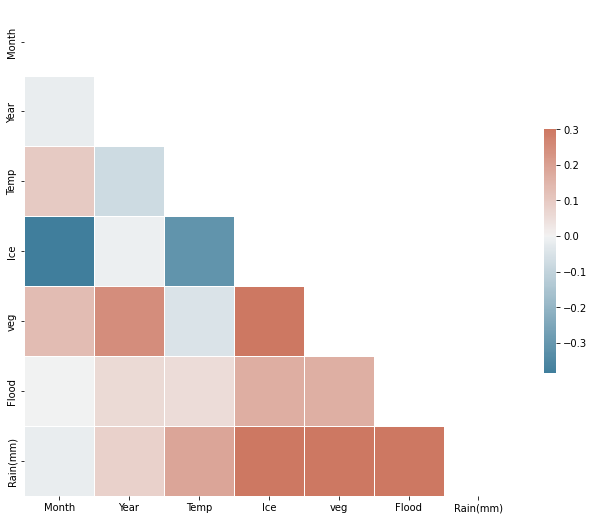

In [64]:
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [65]:
dfx.count().isnull()

Month       False
Year        False
Temp        False
Ice         False
veg         False
Flood       False
Rain(mm)    False
dtype: bool

C:\Users\wwwkh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


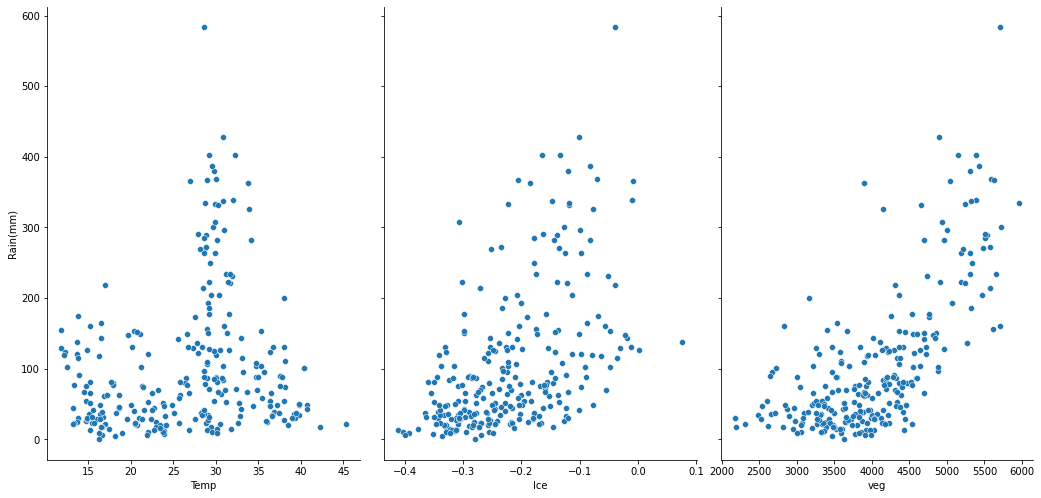

In [66]:
sns.pairplot(dff, x_vars=['Temp','Ice','veg'], y_vars='Rain(mm)', size=7, aspect=0.7)

C:\Users\wwwkh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


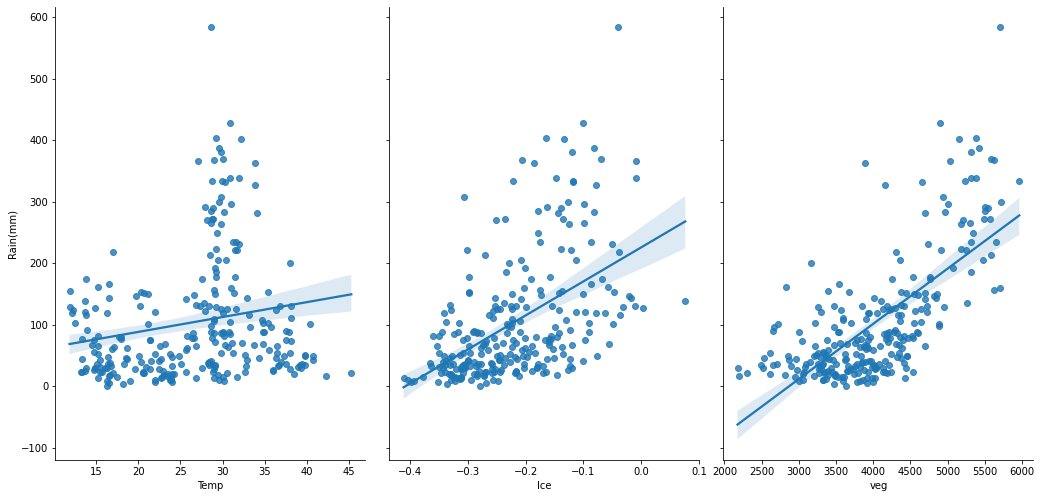

In [67]:
sns.pairplot(dff, x_vars=['Temp','Ice','veg'], y_vars='Rain(mm)', size=7, aspect=0.7, kind='reg')
       

In [68]:
dff.head(24)

,Month,Year,Temp,Ice,veg,Flood,Rain(mm)
index,,,,,,,
2,3,2000,24.030484,-0.123452,4005.3395,False,33.516
3,4,2000,36.019214,-0.217567,3388.6150,False,25.167
4,5,2000,39.772871,-0.237419,2488.4690,False,34.509
5,6,2000,35.715733,-0.148567,2671.7165,False,95.509
6,7,2000,31.886419,-0.051065,4731.4220,False,230.653
7,8,2000,28.860474,-0.139421,5539.1155,False,289.216
8,9,2000,27.970667,-0.256733,4562.2180,False,121.962
9,10,2000,31.764194,-0.325774,3522.5125,False,14.416
10,11,2000,23.857133,-0.294400,3332.5430,False,10.556


In [69]:
dff['Month'].dtype

dtype('int32')